## Import libraries

In [1]:
from data_loader import DataLoader
from plotlib import plot_dataset, plot_dataset_with_predictions
from linear_regression import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

## Load data

In [2]:
dataset_root_directory = './regression-dataset'
attributes, labels = DataLoader.load_full_dataset(dataset_root_directory)
print(attributes.shape, 'training examples')
print(labels.shape, ' training labels')

(200, 2) training examples
(200, 1)  training labels


## Visualize data

<IPython.core.display.Javascript object>


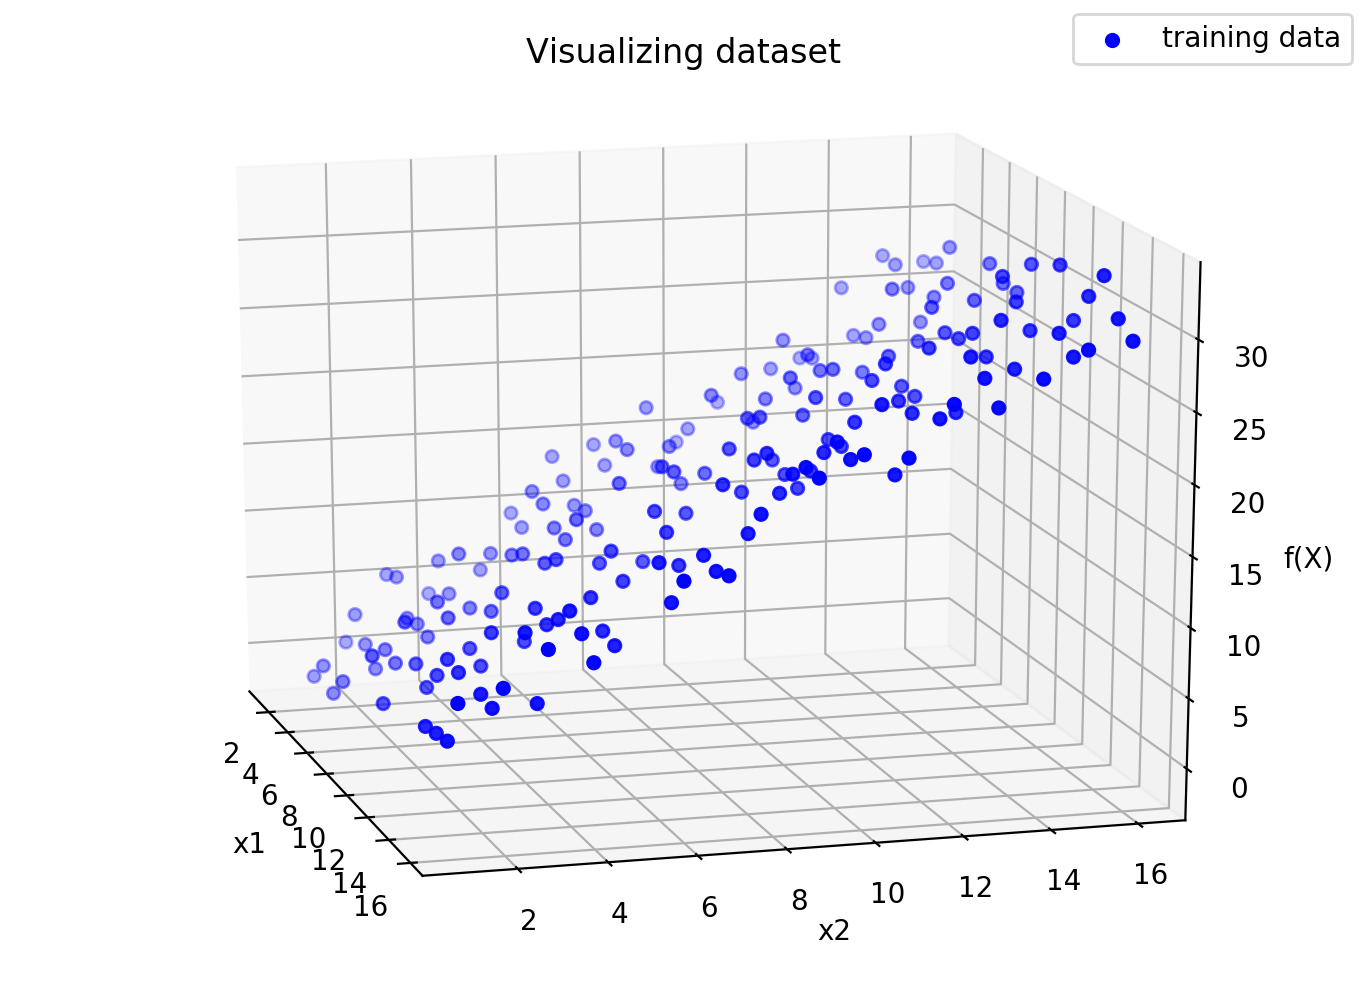

In [3]:
# This step is to verify if Linear Regression is the right method to be used
plot_dataset(attributes, labels)


## Create and learn a model

In [4]:
model = LinearRegression()
model.learn(attributes, labels, verbose=True)
model.summary()

# This learned model can be used for predicting future test data
# Note that the final weights is obtained by retraining the whole dataset on the best lambda value

At lambda = 0.000000 E_ERMS = 1.450215
At lambda = 0.100000 E_ERMS = 1.450132
At lambda = 0.200000 E_ERMS = 1.450055
At lambda = 0.300000 E_ERMS = 1.449984
At lambda = 0.400000 E_ERMS = 1.449919
At lambda = 0.500000 E_ERMS = 1.449860
At lambda = 0.600000 E_ERMS = 1.449806
At lambda = 0.700000 E_ERMS = 1.449758
At lambda = 0.800000 E_ERMS = 1.449715
At lambda = 0.900000 E_ERMS = 1.449678
At lambda = 1.000000 E_ERMS = 1.449645
At lambda = 1.100000 E_ERMS = 1.449618
At lambda = 1.200000 E_ERMS = 1.449595
At lambda = 1.300000 E_ERMS = 1.449577
At lambda = 1.400000 E_ERMS = 1.449564
At lambda = 1.500000 E_ERMS = 1.449555
At lambda = 1.600000 E_ERMS = 1.449551
At lambda = 1.700000 E_ERMS = 1.449551
At lambda = 1.800000 E_ERMS = 1.449556
At lambda = 1.900000 E_ERMS = 1.449564
At lambda = 2.000000 E_ERMS = 1.449577
At lambda = 2.100000 E_ERMS = 1.449593
At lambda = 2.200000 E_ERMS = 1.449614
At lambda = 2.300000 E_ERMS = 1.449638
At lambda = 2.400000 E_ERMS = 1.449666
At lambda = 2.500000 E_ER

## Plot $E_{RMS}$ vs $\lambda$

$E_{RMS}$ is defined as:
![title](rsz_eq1.png)
![title](rsz_eq2.png)

<IPython.core.display.Javascript object>


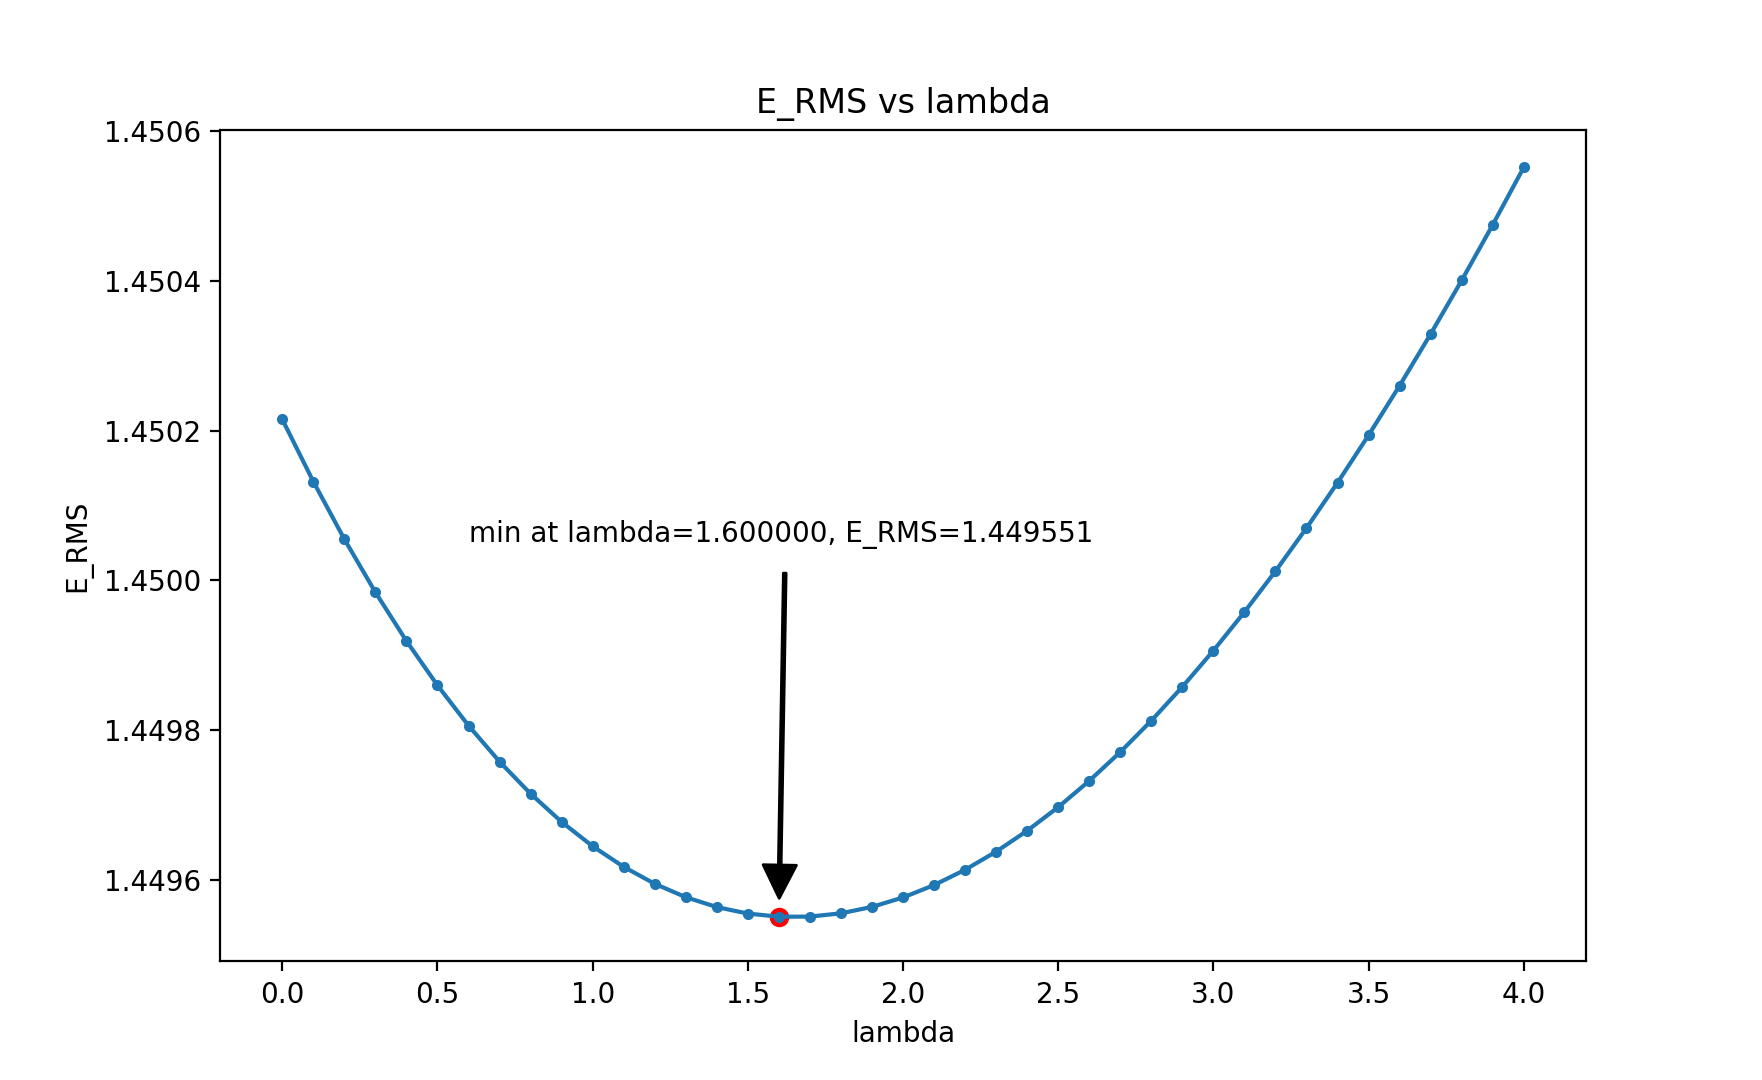

In [5]:
model.plot_E_RMS()

## Test the model

In [6]:
# To generate test data, we split the training data
train_attrs, train_labels, test_attrs, test_labels = DataLoader.load_with_test_data(
                                                         dataset_root_directory,
                                                         split_ratio=0.1)
print(train_attrs.shape, 'training examples')
print(train_labels.shape, 'training labels')
print(test_attrs.shape, 'testing examples')
print(test_labels.shape, 'testing labels')

# Train a new model on new training dataset
model = LinearRegression()
model.learn(train_attrs, train_labels)

# Make predictions
predictions, E_RMS = model.predict(test_attrs, test_labels)
print('\n=====Predictions( True Value , Predicted value )=====')
for values in np.dstack((test_labels, predictions)):
    #print('True label = ', values[0][0], 'Predicted label = ', values[0][1]) 
    print('(',values[0][0], ',', values[0][1], ')')

print('\nRMS Error for predictions = %f' % E_RMS)

(180, 2) training examples
(180, 1) training labels
(20, 2) testing examples
(20, 1) testing labels

=====Predictions( True Value , Predicted value )=====
( 27.113253000000004 , 25.239614001319676 )
( 8.133837 , 7.15358958904213 )
( 6.577702 , 8.608384593097604 )
( 27.055365000000002 , 24.727545542681973 )
( 7.235514 , 5.186726126348954 )
( 5.997294999999999 , 7.8634843245116075 )
( 5.010387000000001 , 6.839347407236206 )
( 1.9701919999999997 , 2.9870308537074823 )
( 6.224846 , 5.698794584986656 )
( 29.147971999999996 , 28.5798620962107 )
( 12.291815 , 11.401558696234407 )
( 32.781701 , 31.093799550658094 )
( 21.760241 , 23.272750538626504 )
( 26.486686 , 24.843961447656124 )
( 19.54126 , 19.420433985097777 )
( 26.776814 , 26.100930174879824 )
( 30.7803 , 30.77955736885217 )
( 21.327282999999998 , 19.024781431434224 )
( 27.795662 , 27.439309273961147 )
( 19.768774 , 20.246744625541403 )

RMS Error for predictions = 1.439249


## Plot the predictions

<IPython.core.display.Javascript object>


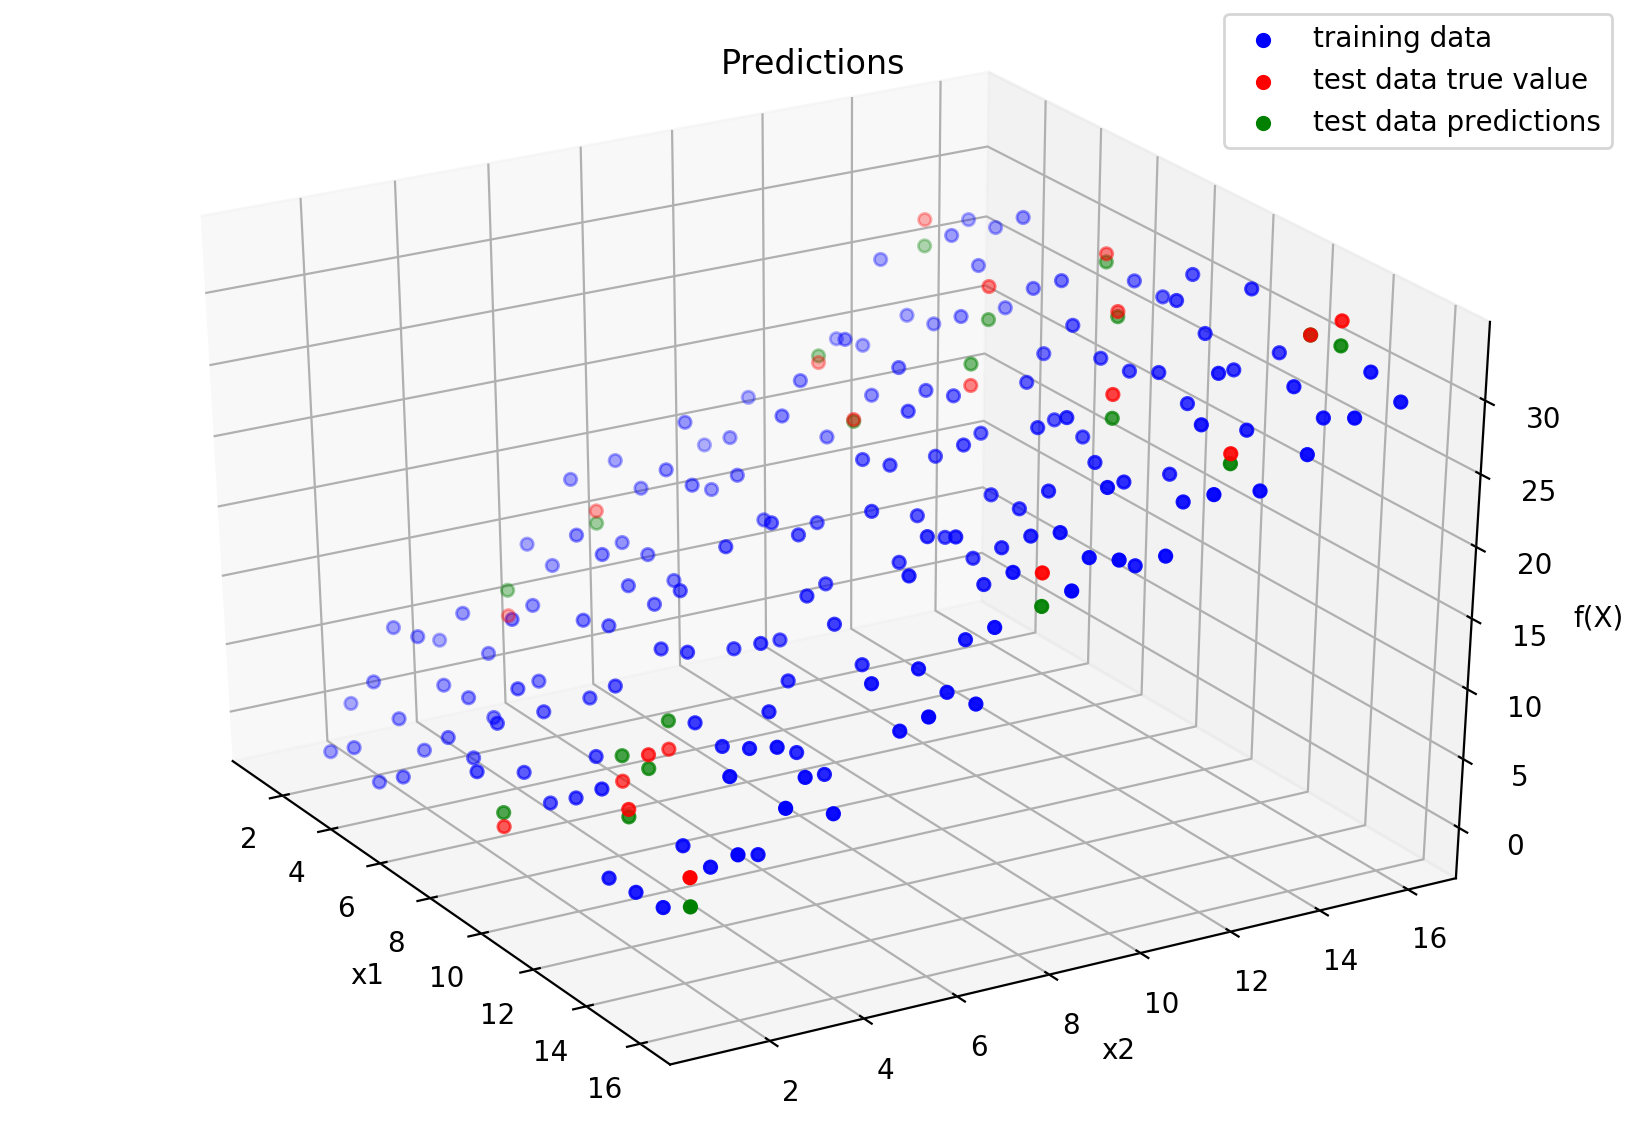

In [7]:
plot_dataset_with_predictions(train_attrs, train_labels, test_attrs, test_labels, predictions)